# **Business Problem**
Can you predict the strength of concrete?

# **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


- **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Age** -- quantitative -- Day (1~365) -- Input Variable
- **Concrete compressive strength** -- quantitative -- MPa -- Output Variable

# **Data Exploration**

In [3]:
df.shape

(1030, 9)

In [4]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [7]:
continuous = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

discrete_categorical = []

discrete_count = []

time_series = []

**Descriptive Statistics**

In [8]:
df[continuous].describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df[continuous].skew()

cement              0.509481
slag                0.800717
flyash              0.537354
water               0.074628
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
csMPa               0.416977
dtype: float64

age column is Right Skewed --> Apply Data Transformation (log, root, box-cox)

**Plots**

In [10]:
continuous = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

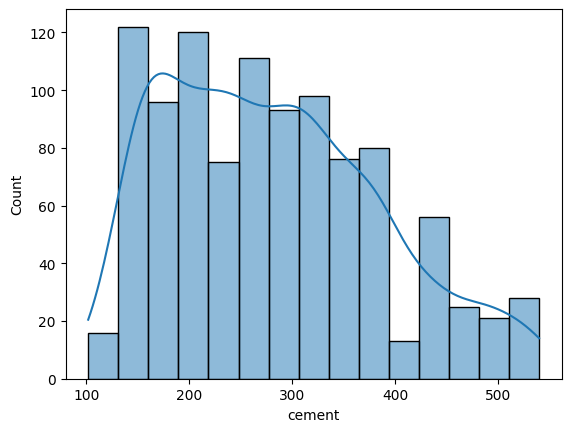

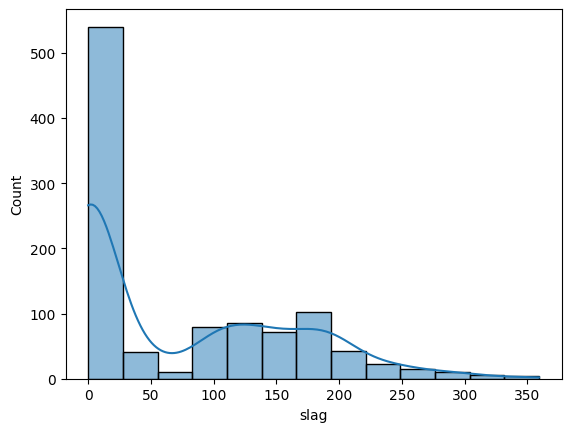

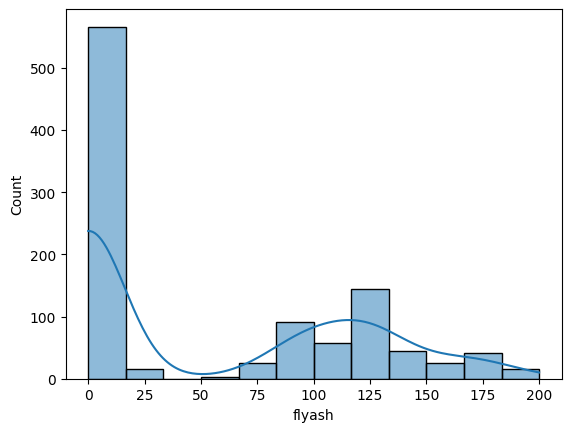

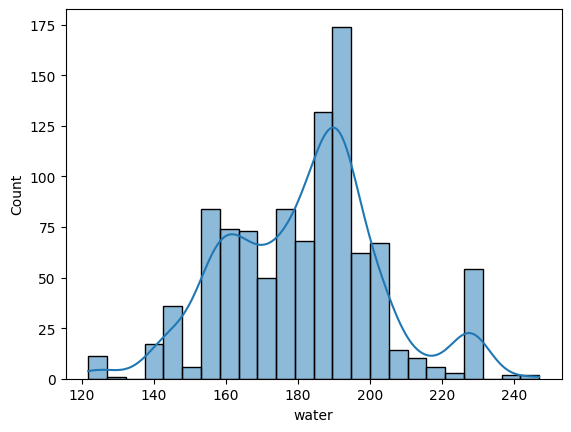

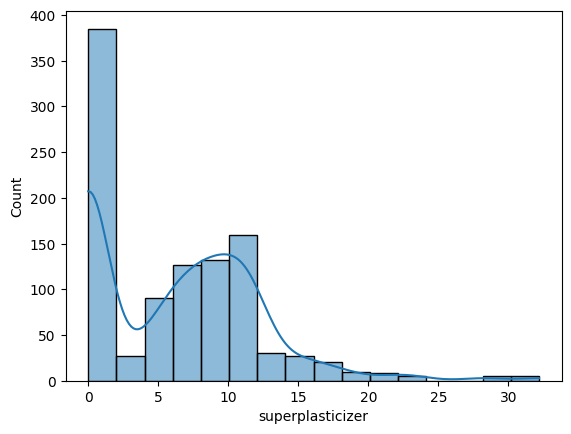

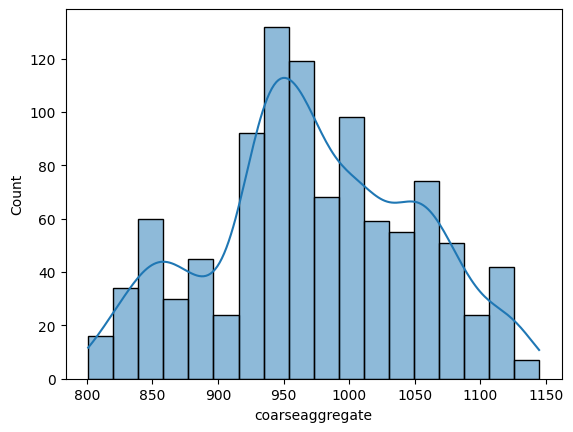

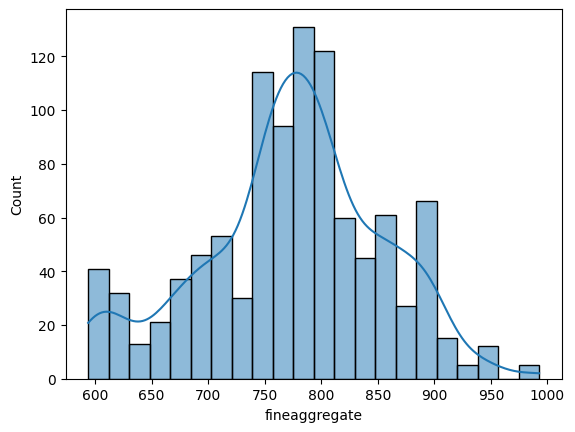

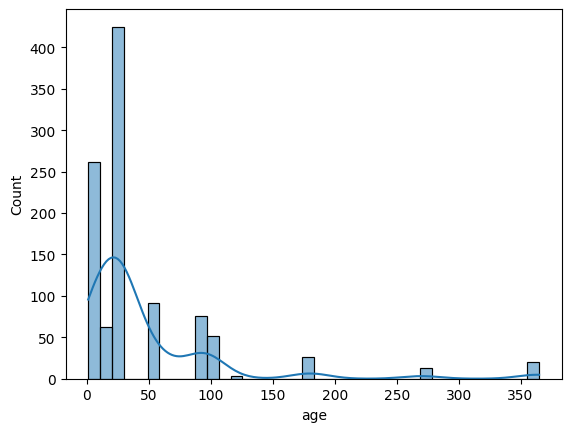

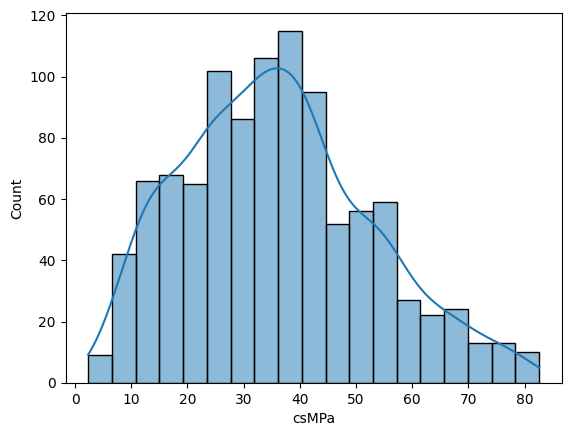

In [11]:
for column in continuous:
  sns.histplot(df[column], kde = True)
  plt.show()

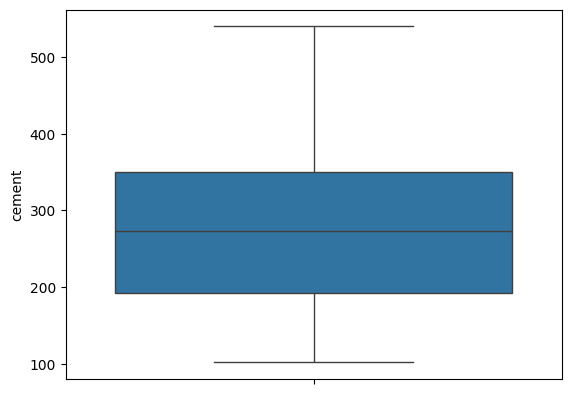

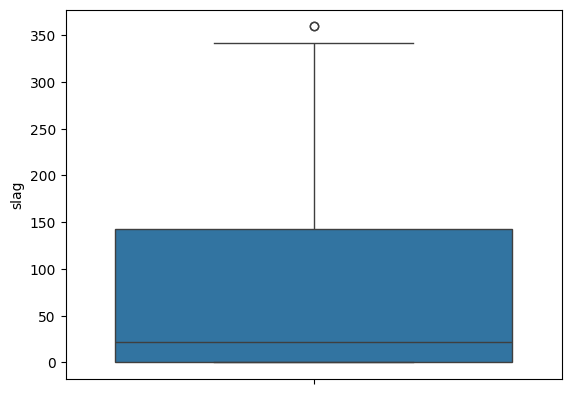

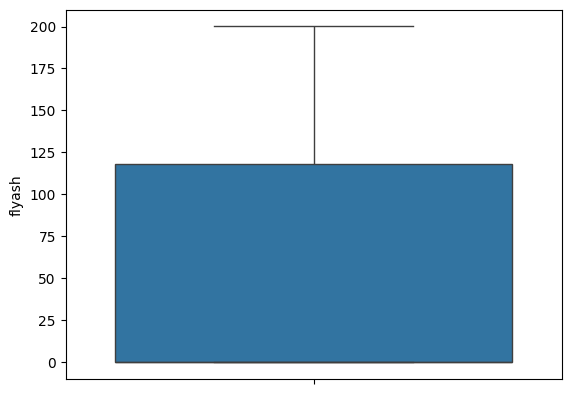

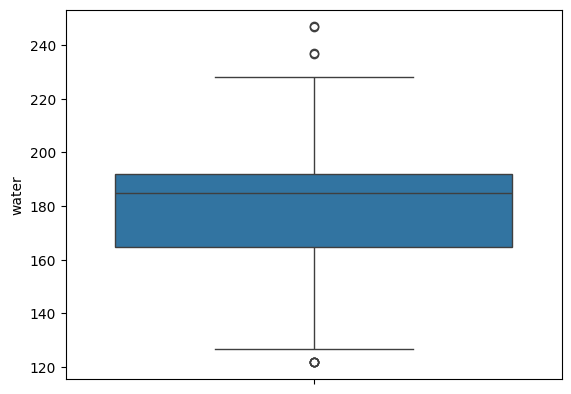

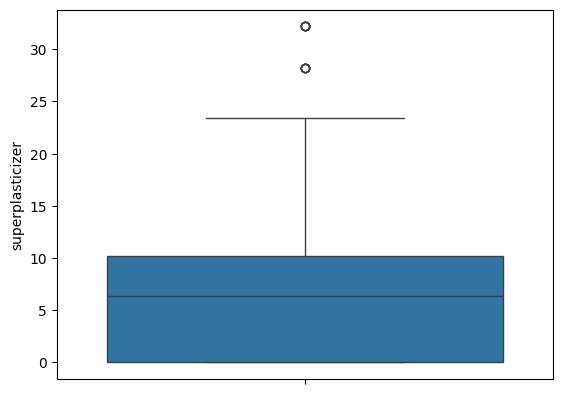

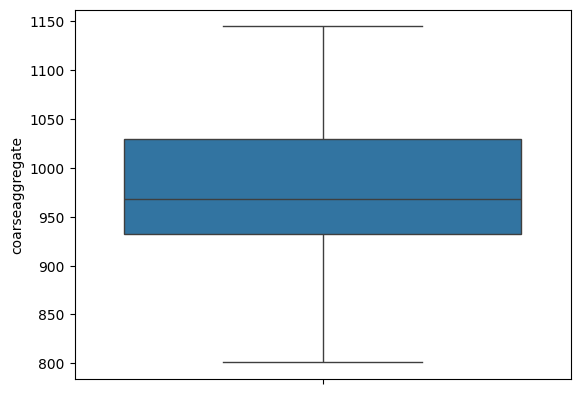

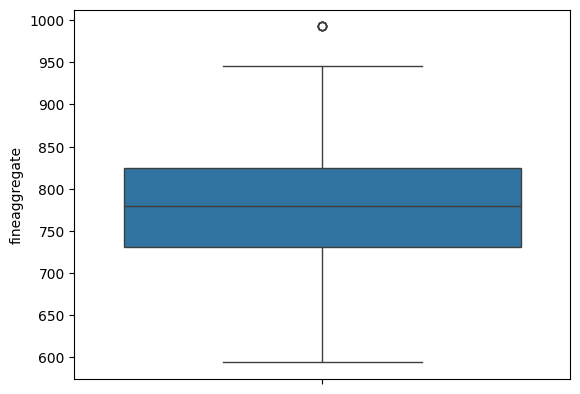

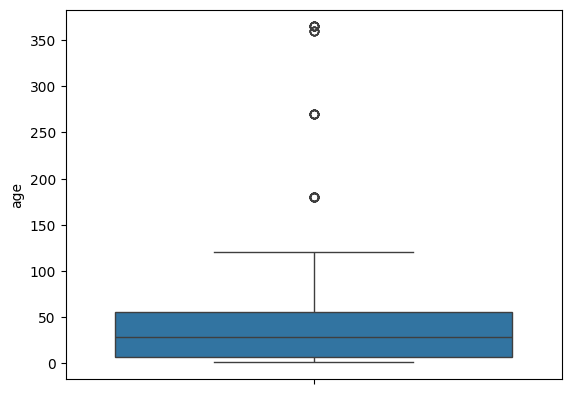

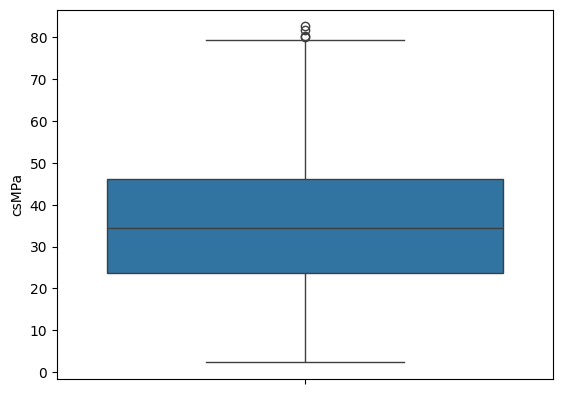

In [12]:
for column in continuous:
  sns.boxplot(df[column])
  plt.show()

In [13]:
df[continuous].corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

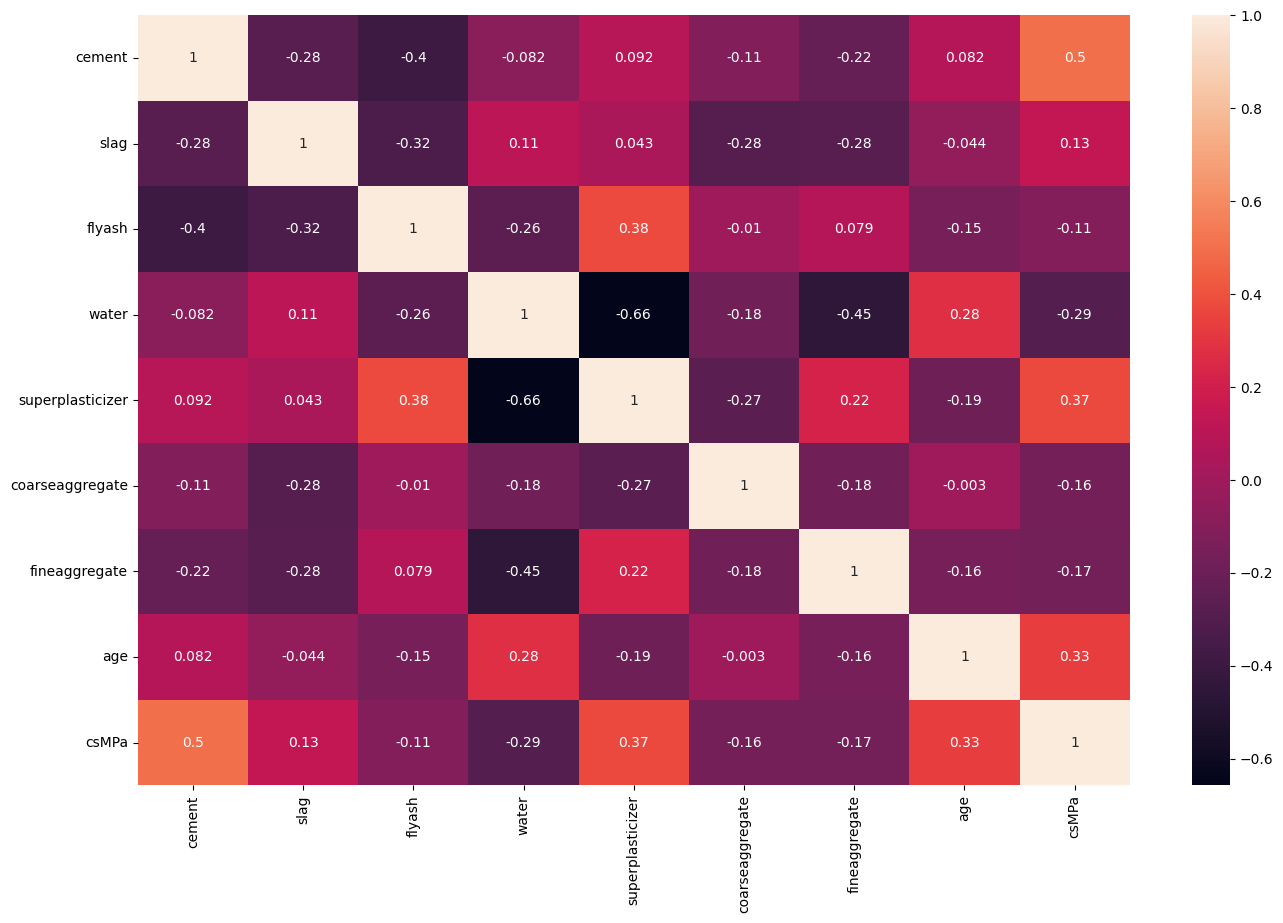

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[continuous].corr(), annot = True)

slag, flyash, coarseaggregate, fineaggregate have less correlation with Output Variable(csMPa) --> i.e. |r| < 0.2 --> Drop them (Dropping them is decreasing the accuracy of the Linear Model...so we will not drop them, so instead of taking threshold as 0.2, we will take it as 0.1 ---> so |r| < 0.1, hence...no column have less than 0.1 correlation then just no need to drop any column)

water and superplasticizer --> |-0.66| = 0.66 (high correlation) --> Collinearity Problem --> Drop any one which have high VIF

In [15]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [16]:
# df = df.drop(columns = {'slag', 'flyash', 'coarseaggregate', 'fineaggregate'})

In [17]:
import statsmodels.formula.api as smf

rsq_water = smf.ols('water~cement+slag+flyash+superplasticizer+coarseaggregate+fineaggregate+age', data = df).fit().rsquared
vif_water = 1 / (1-rsq_water)

rsq_superplasticizer = smf.ols('superplasticizer~cement+slag+flyash+water+coarseaggregate+fineaggregate+age', data = df).fit().rsquared
vif_superplasticizer = 1 / (1-rsq_superplasticizer)

print('VIF(water): ', vif_water)
print('VIF(superplasticizer): ', vif_superplasticizer)

VIF(water):  7.003956703955311
VIF(superplasticizer):  2.9637757487001783


Here, we can see that VIF(water) > 4 ---> Drop water column

In [18]:
df = df.drop(columns = {'water'})

# **Data Preprocessing**

# **1. Data Cleaning**

No Data Cleaning is required

# **2. Data Wrangling**

**1. Data Transformation**

In [19]:
df.skew()

cement              0.509481
slag                0.800717
flyash              0.537354
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
csMPa               0.416977
dtype: float64

In [20]:
df['log_age'] = np.log(df['age'])
df['root_age'] = np.sqrt(df['age'])

from scipy.stats import boxcox
df['boxcox_age'], param = boxcox(df['age'])

print('Log: ', df['log_age'].skew())
print('Root: ', df['root_age'].skew())
print('BoxCox: ', df['boxcox_age'].skew())

Log:  -0.1513510704675477
Root:  1.56436951014719
BoxCox:  -0.006073812011114169


In [21]:
df = df.drop(columns = {'age', 'log_age', 'root_age'})
df

,cement,slag,flyash,superplasticizer,coarseaggregate,fineaggregate,csMPa,boxcox_age
0,540.0,0.0,0.0,2.5,1040.0,676.0,79.99,3.619520
1,540.0,0.0,0.0,2.5,1055.0,676.0,61.89,3.619520
2,332.5,142.5,0.0,0.0,932.0,594.0,40.27,6.441153
3,332.5,142.5,0.0,0.0,932.0,594.0,41.05,6.840674
4,198.6,132.4,0.0,0.0,978.4,825.5,44.30,6.822265
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,870.1,768.3,44.28,3.619520
1026,322.2,0.0,115.6,10.4,817.9,813.4,31.18,3.619520
1027,148.5,139.4,108.6,6.1,892.4,780.0,23.70,3.619520
1028,159.1,186.7,0.0,11.3,989.6,788.9,32.77,3.619520


Best one is BoxCox --> So, we will drop age, log_age, root_age columns and keep boxcox_age column

**2. Encoding**

No encoding is required here

**3. Feature Scaling**

If data is Gaussian Distribution (Normally Distributed) --> Use StandardScaler()

If data is Skewed Distribution --> Use MinMaxScaler()

**Scaling is not required in Regression Projects**

In [22]:
df.to_csv('cleaned_Concrete.csv', index = False)

**Finding Best Random State Value**

In [23]:
df.columns

Index(['cement', 'slag', 'flyash', 'superplasticizer', 'coarseaggregate',
       'fineaggregate', 'csMPa', 'boxcox_age'],
      dtype='object')

In [24]:
X = df[['cement', 'slag', 'flyash', 'superplasticizer', 'coarseaggregate', 'fineaggregate','boxcox_age']]

y = df['csMPa']

In [25]:
R2 = []
CV = []

for i in range(1, 100):
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)

  #Modelling
  from sklearn.linear_model import LinearRegression

  model = LinearRegression()
  model.fit(X_train, y_train)

  #Prediction
  ypred_train = model.predict(X_train)

  #Evaluation
  from sklearn.metrics import r2_score

  r2 = r2_score(y_train, ypred_train)

  from sklearn.model_selection import cross_val_score

  cv_score = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'r2').mean()

  R2.append(r2)
  CV.append(cv_score)


data1 = pd.DataFrame({'r2_score' : R2, 'cv_score' : CV})

data2 = data1[abs(data1['r2_score'] - data1['cv_score']) <= 0.05]

result = data2[data2['cv_score'] == data2['cv_score'].max()]
rs = result.index.tolist()[0]
rs

53